# Scikit-learn API

In [1]:
from sklearn import datasets
import numpy as np

#Loads iris-dataset
iris = datasets.load_iris()

'''
We will assign the petal length and petal width of the 150 flower examples to the
feature matrix, X, and the corresponding class labels of the flower species to the
vector array, y:
'''
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


0 = Iris-setosa
1 = Iris-versicolor
2 = Iris-virginica

## Mitä data oikein sisältää?

Muutetaan irisdata pandasin dataframeen ja käytetään seabornin pairplottia tehdäksemme monipuolisen kuvaajan

In [2]:
import seaborn as sns
import pandas as pd
irisdata = pd.DataFrame(iris.data, columns=iris.feature_names)

classes = iris.target

irisdata['class'] = classes

irisdata.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


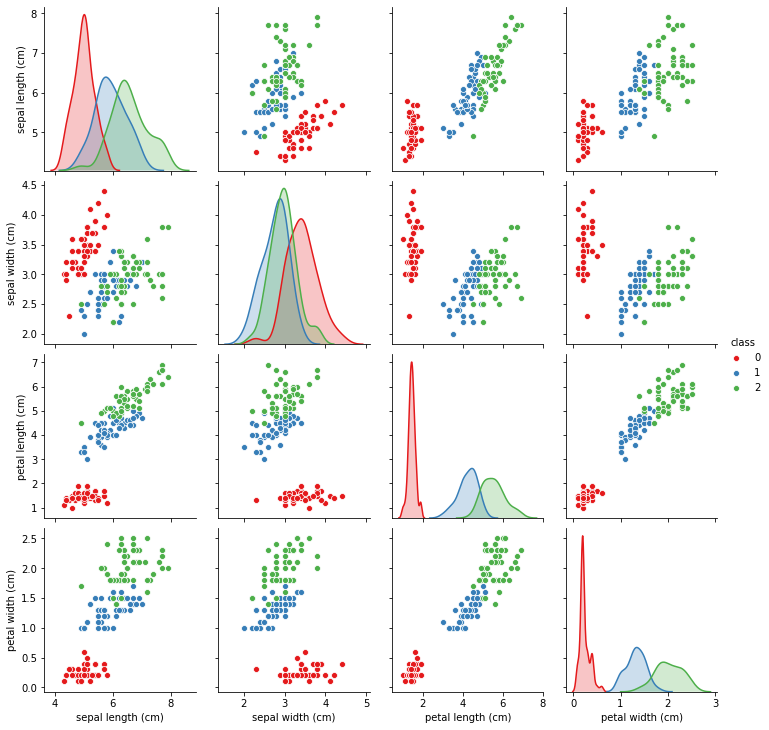

In [3]:
sns.pairplot(irisdata,hue='class',palette='Set1')

0 = Iris-setosa
1 = Iris-versicolor
2 = Iris-virginica

### Splitataan opetus- ja testausdatasetteihin

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print('Labels counts in y:', np.bincount(y))

Labels counts in y: [50 50 50]


In [5]:
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


## Standartointi

StandardScaler vakioi ominaisuudet poistamalla keskiarvon ja skaalaa yksikkövarianssiin.

x:n vakiopisteet lasketaan seuraavasti:

**z = (x - u) / s**

missä **u** on harjoitusnäytteiden keskiarvo tai nolla, jos with_mean = False, ja **s** on harjoitusnäytteiden keskihajonta tai yksi, jos with_std = False.

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

---


# K-nearest neighbors – a lazy learning algorithm

KNN (k-nearest neighbor) sanotaan olevan laiska, koska se ei opi koulutusjoukosta välittömästi, sen sijaan se tallentaa tietojoukon ja luokitteluhetkellä se suorittaa tietojoukolle toiminnon.

**k** = lähimpien naapureiden lukumäärä, joka otetaan huomioon määriteltäessä luokka uudelle datanäytteelle 

## Näin k-NN toimii:
1. Valitsee k:n lukumäärän
2. Laskee naapureiden k:n lukumäärän etäisyyden etäisyysmittarilla.
3. Etsii luokiteltavan tietueen k-lähimmät naapurit.
4. Laske näiden k-naapurien joukossa kunkin luokan datapisteiden määrä.
5. Määritä uudet datapisteet siihen luokkaan, johon naapurin lukumäärä on suurin..

## k-NN scikitlearnilla käyttäen erilaisia pituus mittareita

Esim. "Euclidisen pituuden" lasketaan näin:

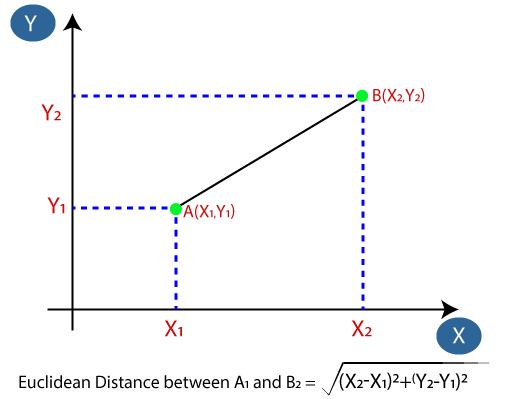

Onneksi skicit-learnissä on luokittelija joka tekee tämän itse:

### Alueiden plottaus funktio (Regressio tehtävästä)

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')

        # highlight test examples with circles
        if test_idx:
            # plot all examples
            X_test, y_test = X[test_idx, :], y[test_idx]

            plt.scatter(X_test[:, 0], X_test[:, 1],
                        c='', edgecolor='black', alpha=1.0,
                        linewidth=1, marker='o',
                        s=100, label='test set')

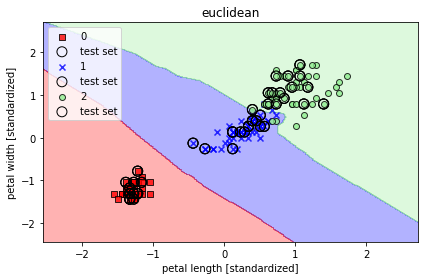

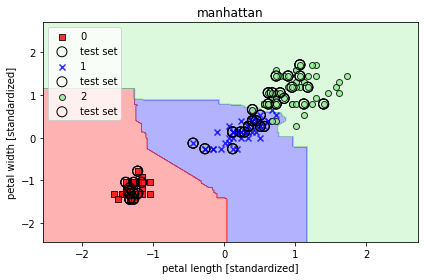

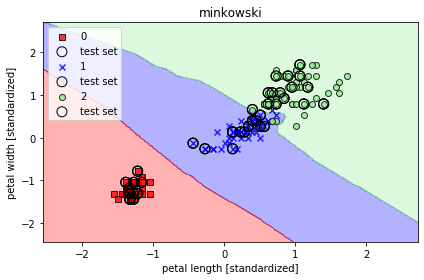

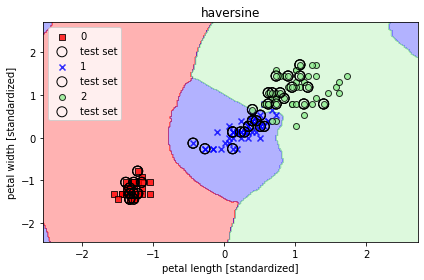

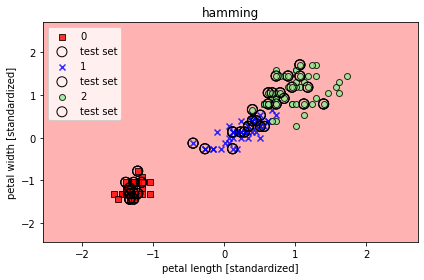

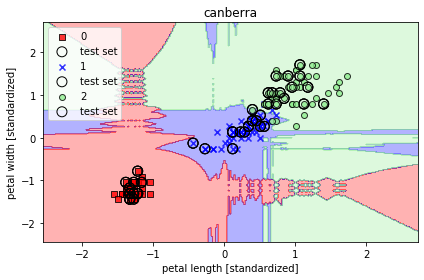

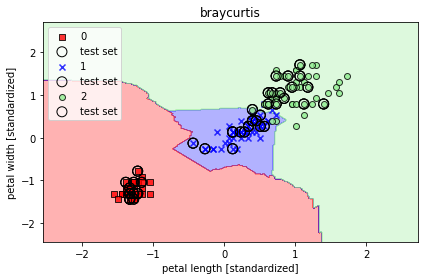

In [8]:
#Specify the indices
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

#Plotting
from sklearn.neighbors import KNeighborsClassifier

metrics=  ['euclidean',
           'manhattan',
           'minkowski',
           'haversine',
           'hamming',
           'canberra',
           'braycurtis']


for i in metrics:
    # n_neighbors = Number of neightbours
    # p = Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
    # metric = The distance metric to use for the tree
    knn = KNeighborsClassifier(n_neighbors=5, p=2,
                           metric=i)

    knn.fit(X_train_std, y_train)
    
    plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105,150))
    plt.title(i)
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

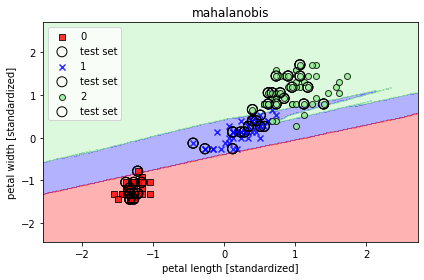

In [9]:
# Mahalanobis-metric requires an addiotinal parameter V
mahal = np.cov(X.T)

knn = KNeighborsClassifier(n_neighbors=5,
                           metric='mahalanobis', 
                           metric_params={'V': mahal})

knn.fit(X_train_std, y_train)
    
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105,150))

plt.title('mahalanobis')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Etäisyys mittarit, joihin tarviitsee jonkun muun parametrin joita en tajunnut miten saa toimimaan:

- “wminkowski” = sum(|w * (x - y)|^p)^(1/p)
- “seuclidean” = sqrt(sum((x - y)^2 / V))

wminkowski antaa:
- TypeError: __init__() takes exactly 2 positional arguments (1 given)
    - Käyttää olevinaan samaa p-arvoa mitä minkowski, muttei silti tykkää.
    
seuclidean tahtoisi metric_param-parametrin V (saman minkä mahalanobis), muttei silti halua sitä samaa(?)

Eri mittarit käyttävät eri laskutapoja (esim. "canberra" käyttää kaavaa *sum(|x - y| / (|x| + |y|))*), joten siksi lopussa olevat näyttävät aika hupsuilta. Hamming käyttää kaavaa *N_unequal(x, y) / N_tot*, joka ilmeisesti jakaa pisteiden 
epätasa-arvon totaalilla(?).

Eli ei siis mitään hajua, mutta ilmeisesti se liitty joten ensimmäiseen arvoon kuvaajan perusteella...

## Optimaalisin k:n arvo visuaalisesti

Optimaalisen k:n arvon löytäminen on hankalaa visuaalisesti, mutta hyvällä tuurilla sen voisi arvatakin. Jos keskittyy etsimään kuvaa missä ei ole over- eikä underfitattu.

Katsotaanpas miltä eri k:n arvolla plotatut kuviot näyttävät:

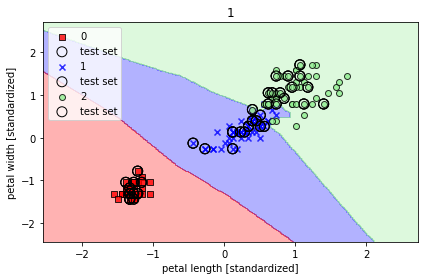

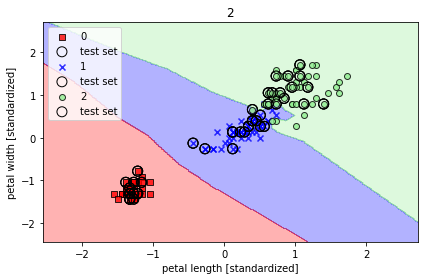

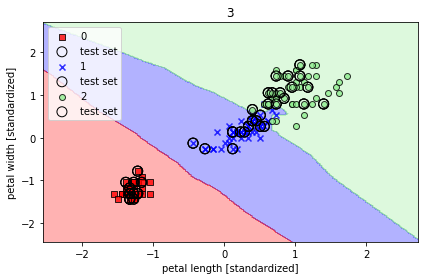

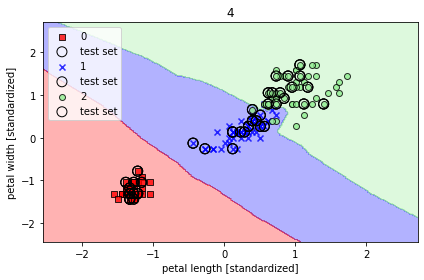

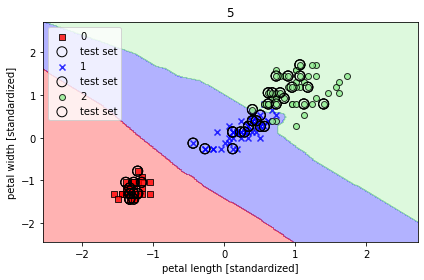

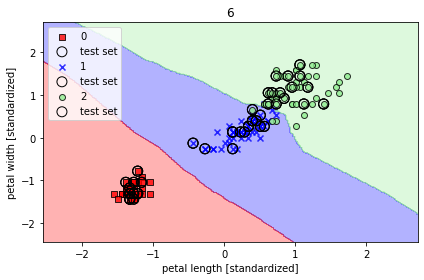

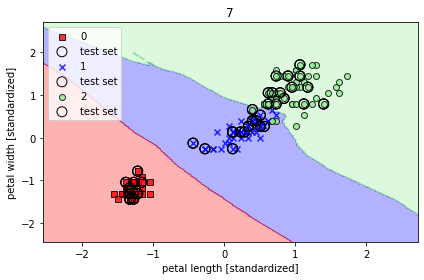

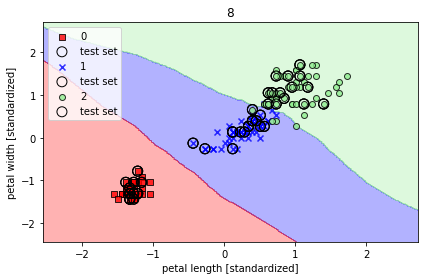

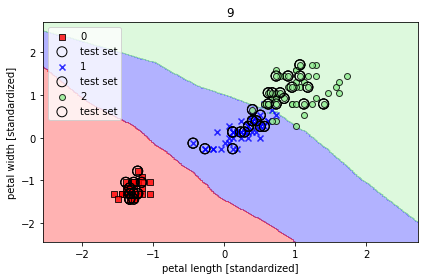

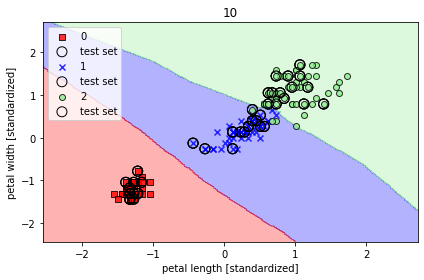

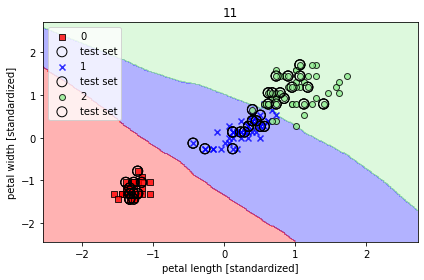

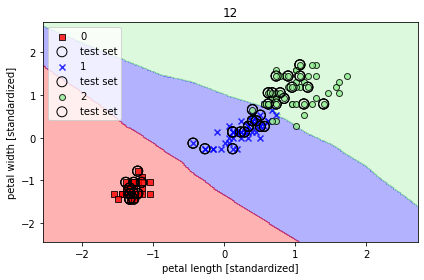

In [10]:
for i in range(1,13):
    knn = KNeighborsClassifier(n_neighbors=i, p=2,
                               metric="euclidean")

    knn.fit(X_train_std, y_train)

    plot_decision_regions(X_combined_std, y_combined, 
                          classifier=knn, test_idx=range(105,150))

    plt.title(i)
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

Visuaalisesti jos yritettäisiin päättää mikä k:n arvo on paras, tulisi siitä tappelu tai ei vaan löytyisi sitä oikeasti, matemaattisesti optimaalisinta arvoa.

## Eri matkan mittarien **pairwise** matka X ja Y välillä

**Pairwise** (parivertailu) on yleensä mikä tahansa prosessi, jossa verrataan entiteettejä pareittain sen arvioimiseksi, kumpi kokonaisuuksista on edullinen, vai onko siinä suurempi määrä kvantitatiivisia ominaisuuksia, vai ovatko nämä kaksi kokonaisuutta identtisiä.

### Reaaliarvoisille vektoritiloille

In [11]:
from sklearn.neighbors import DistanceMetric

# sqrt(sum((x - y)^2))
dist_euc = DistanceMetric.get_metric('euclidean')
dist_euc.pairwise(X)

array([[0.        , 0.        , 0.1       , ..., 4.20475921, 4.5177428 ,
        4.03112887],
       [0.        , 0.        , 0.1       , ..., 4.20475921, 4.5177428 ,
        4.03112887],
       [0.1       , 0.1       , 0.        , ..., 4.29534632, 4.60651712,
        4.12310563],
       ...,
       [4.20475921, 4.20475921, 4.29534632, ..., 0.        , 0.36055513,
        0.2236068 ],
       [4.5177428 , 4.5177428 , 4.60651712, ..., 0.36055513, 0.        ,
        0.58309519],
       [4.03112887, 4.03112887, 4.12310563, ..., 0.2236068 , 0.58309519,
        0.        ]])

In [12]:
# sum(|x - y|)
dist_man = DistanceMetric.get_metric('manhattan')
dist_man.pairwise(X)

array([[0. , 0. , 0.1, ..., 5.6, 6.1, 5.3],
       [0. , 0. , 0.1, ..., 5.6, 6.1, 5.3],
       [0.1, 0.1, 0. , ..., 5.7, 6.2, 5.4],
       ...,
       [5.6, 5.6, 5.7, ..., 0. , 0.5, 0.3],
       [6.1, 6.1, 6.2, ..., 0.5, 0. , 0.8],
       [5.3, 5.3, 5.4, ..., 0.3, 0.8, 0. ]])

In [13]:
# max(|x - y|)
dist_che = DistanceMetric.get_metric('chebyshev')
dist_che.pairwise(X)

array([[0. , 0. , 0.1, ..., 3.8, 4. , 3.7],
       [0. , 0. , 0.1, ..., 3.8, 4. , 3.7],
       [0.1, 0.1, 0. , ..., 3.9, 4.1, 3.8],
       ...,
       [3.8, 3.8, 3.9, ..., 0. , 0.3, 0.2],
       [4. , 4. , 4.1, ..., 0.3, 0. , 0.5],
       [3.7, 3.7, 3.8, ..., 0.2, 0.5, 0. ]])

In [14]:
# sum(|x - y|^p)^(1/p)
dist_min = DistanceMetric.get_metric('minkowski')
dist_min.pairwise(X)

array([[0.        , 0.        , 0.1       , ..., 4.20475921, 4.5177428 ,
        4.03112887],
       [0.        , 0.        , 0.1       , ..., 4.20475921, 4.5177428 ,
        4.03112887],
       [0.1       , 0.1       , 0.        , ..., 4.29534632, 4.60651712,
        4.12310563],
       ...,
       [4.20475921, 4.20475921, 4.29534632, ..., 0.        , 0.36055513,
        0.2236068 ],
       [4.5177428 , 4.5177428 , 4.60651712, ..., 0.36055513, 0.        ,
        0.58309519],
       [4.03112887, 4.03112887, 4.12310563, ..., 0.2236068 , 0.58309519,
        0.        ]])

### 2-dimensionaalisille vectrotiloille

In [15]:
# 2 arcsin(sqrt(sin^2(0.5*dx) + cos(x1)cos(x2)sin^2(0.5*dy)))
dist_hav = DistanceMetric.get_metric('haversine')
dist_hav.pairwise(X)

array([[0.        , 0.        , 0.1       , ..., 2.66528257, 2.52522189,
        2.72437446],
       [0.        , 0.        , 0.1       , ..., 2.66528257, 2.52522189,
        2.72437446],
       [0.1       , 0.1       , 0.        , ..., 2.6461002 , 2.55047101,
        2.67929174],
       ...,
       [2.66528257, 2.66528257, 2.6461002 , ..., 0.        , 0.25845799,
        0.1306749 ],
       [2.52522189, 2.52522189, 2.55047101, ..., 0.25845799, 0.        ,
        0.38720368],
       [2.72437446, 2.72437446, 2.67929174, ..., 0.1306749 , 0.38720368,
        0.        ]])

### Integer-arvoisille vektoritiloille

In [16]:
# N_unequal(x, y) / N_tot
dist_hamming = DistanceMetric.get_metric('hamming')
dist_hamming.pairwise(X)

array([[0. , 0. , 0.5, ..., 1. , 1. , 1. ],
       [0. , 0. , 0.5, ..., 1. , 1. , 1. ],
       [0.5, 0.5, 0. , ..., 1. , 1. , 1. ],
       ...,
       [1. , 1. , 1. , ..., 0. , 1. , 1. ],
       [1. , 1. , 1. , ..., 1. , 0. , 1. ],
       [1. , 1. , 1. , ..., 1. , 1. , 0. ]])

In [17]:
# sum(|x - y| / (|x| + |y|))
dist_can = DistanceMetric.get_metric('canberra')
dist_can.pairwise(X)

array([[0.        , 0.        , 0.03703704, ..., 1.39393939, 1.42823529,
        1.36923077],
       [0.        , 0.        , 0.03703704, ..., 1.39393939, 1.42823529,
        1.36923077],
       [0.03703704, 0.03703704, 0.        , ..., 1.41818182, 1.4519403 ,
        1.39375   ],
       ...,
       [1.39393939, 1.39393939, 1.41818182, ..., 0.        , 0.08863537,
        0.06234032],
       [1.42823529, 1.42823529, 1.4519403 , ..., 0.08863537, 0.        ,
        0.15052265],
       [1.36923077, 1.36923077, 1.39375   , ..., 0.06234032, 0.15052265,
        0.        ]])

In [18]:
# sum(|x - y|) / (sum(|x|) + sum(|y|))
dist_bray = DistanceMetric.get_metric('braycurtis')
dist_bray.pairwise(X)

array([[0.        , 0.        , 0.03225806, ..., 0.63636364, 0.65591398,
        0.62352941],
       [0.        , 0.        , 0.03225806, ..., 0.63636364, 0.65591398,
        0.62352941],
       [0.03225806, 0.03225806, 0.        , ..., 0.65517241, 0.67391304,
        0.64285714],
       ...,
       [0.63636364, 0.63636364, 0.65517241, ..., 0.        , 0.03355705,
        0.0212766 ],
       [0.65591398, 0.65591398, 0.67391304, ..., 0.03355705, 0.        ,
        0.05479452],
       [0.62352941, 0.62352941, 0.64285714, ..., 0.0212766 , 0.05479452,
        0.        ]])

# Optimaalinen k:n arvo

## GridSearchCV

GridSearchCV luo tyhjän ruudukon ja täyttää sen mahdollisilla arvoilla joko naapureiden lukumääräällä tai mitä tahansa muuta koneoppimisen parametria, jonka haluamme optimoida. Sitten se käyttää kutakin arvoa ruudukossa ja testaa sen suorituskykyä ja määrittää parametrin optimaalisen arvon.

In [43]:
from sklearn.model_selection import GridSearchCV

#Initializing a grid with possible number of neighbors from 1 to 24
grid = {'n_neighbors' : np.arange(1, 25)}

#Initializing a k-NN classifier
knn_classifier = KNeighborsClassifier()

#Using cross validation to find optimal number of neighbors
knn = GridSearchCV(knn_classifier, grid, cv = 10, n_jobs=-1)
knn.fit(X_train, y_train)

#Extracting the optimal number of neighbors
knn.best_params_

{'n_neighbors': 5}

### Optimaalisin k:n arvo on siis 5

Asetetaan cv-argumentiksi 10, mikä osoittaa, että haluamme käyttää 10-kertaista ristivalidointia tätä tehdessäsi. 

Ristivalidointi on tekniikka, jossa luokittelija ensin jakaa tiedot 10 osaan. Ensimmäisiä yhdeksää osaa käytetään harjoitusjoukkona, kun taas 10. osaa käytetään testisarjana. 

Toisessa iteraatiossa käytämme kahta ensimmäistä osaa ja 10. osaa harjoitusjoukkona, kun taas yhdeksättä osaa käytetään testisarjana. 

Tätä prosessia toistetaan, kunnes kaikki datan osat käytetään testaukseen. Tämä luo erittäin vankan luokittelijan, koska olemme käyttäneet koko tietojoukkoa koulutukseen ja testaamiseen, emmekä ole jättäneet osaa tiedoista.

# Etsitään optimaalisimmat parametrit

In [74]:
#Extracting the accuracy score for optimal number of neighbors
knn.best_score_

0.9619047619047619

In [72]:
# Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a callable function.
parameters = {'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean',
                        'manhattan',
                        'minkowski'],
              'n_jobs':[-1, 1],
              'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
              'p':[1,2],
              'weights':['uniform','distance']}

knn_classifier = KNeighborsClassifier()

#Using cross validation to find optimal number of neighbors
knn = GridSearchCV(knn_classifier, param_grid = parameters, cv=3)
knn.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_jobs': [-1, 1],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [73]:
knn.best_params_

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_jobs': -1,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'uniform'}

### Paras mittari on siis euclidean ja edelleen 5 on paras k:n arvo

In [70]:
# Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a callable function.
parameters = {'algorithm':['auto'],
              'metric':['haversine',
                        'hamming',
                        'canberra',
                        'braycurtis'],
              'n_jobs':[-1, 1],
              'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
              'p':[1,2],
              'weights':['uniform','distance']}

knn_classifier = KNeighborsClassifier()

#Using cross validation to find optimal number of neighbors
knn = GridSearchCV(knn_classifier, param_grid = parameters, cv=3)
knn.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto'],
                         'metric': ['haversine', 'hamming', 'canberra',
                                    'braycurtis'],
                         'n_jobs': [-1, 1], 'n_neighbors': [5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [71]:
knn.best_params_

{'algorithm': 'auto',
 'metric': 'braycurtis',
 'n_jobs': -1,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'uniform'}

### Braycurtis on siis paras (nämä loput mittarit ilmeisesti käyttävät pelkästään ball_tree-algorytmiä)

## Mielenkiinnon vuoksi, chekataanpas miltä tämä GridSearch-ruudukko näyttää

Otetaan tämä GridSearch objecti, joka on dictionary, jossa on avaimet sarakeotsikoina ja arvot sarakkeina. Tämä voidaan muuttaa numpy DataFrameen

In [ ]:
import pandas as pd

#cv_results_ : dict of numpy (masked) ndarrays
#A dict with keys as column headers and values as columns, that can be imported into a pandas DataFrame.
knn_scores = pd.DataFrame(knn.cv_results_)
knn_scores.head(10)

## Skaalaus parempaan suorituskykyyn


K-NN toimii etäisyyden perusteella. Kun uusi datapiste heitetään tietojoukkoon ja algoritmille annetaan tehtäväksi luokitella tämä uusi datapiste, se käyttää etäisyyttä tarkistaakseen sitä lähinnä olevat pisteet.

**Esim.** Ominaisuuden yksi alue on 0-800, kun taas ominaisuuden 2 alue on 1-5, tällä etäisyystiedolla ei ole enää merkitystä. 

Kaikilla ominaisuuksilla pitää olla sama arvoalue, jotta etäisyysmitta on kaikkien ominaisuuksien tasolla.

### Eli siis standartoidaan:

In [ ]:
from sklearn.pipeline import Pipeline

#Setting up the scaling pipeline
pipeline_order = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = 5))]
# pass in the order of the pipeline as the only argument.
pipeline = Pipeline(pipeline_order)

#Fitting the classfier to the scaled dataset
knn_classifier_scaled = pipeline.fit(X_train, y_train)

# for comparison
print("Before standardizing: ", knn.score(X_test, y_test))
#Extracting the score
print("After standardizing: ", knn_classifier_scaled.score(X_test, y_test))

## Evaluoidaan k:ta ja pituusmittareita gridsearchCV:llä

Metrics and scoring: quantifying the quality of predictions:

https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules

Mallin ennusteiden laatua voidaan arvioida kolmella eri API:lla:

- **Estimaattoripistemenetelmä**: Estimaattoreilla on pisteytysmenetelmä, joka tarjoaa oletusarviointikriteerin ongelmalle, jonka ne on suunniteltu ratkaisemaan. Tätä ei käsitellä tällä sivulla, vaan kunkin arvioijan dokumentaatiossa.

- **Pisteytysparametri**: Mallien arviointityökalut, jotka käyttävät ristivalidointia (kuten model_selection.cross_val_score ja model_selection.GridSearchCV), luottavat sisäiseen pisteytysstrategiaan. Tätä käsitellään kohdassa Pisteytysparametri: mallien arviointisääntöjen määrittely.

- **Metriset toiminnot**: Mittamoduuli toteuttaa ennustevirheitä arvioivat toiminnot tiettyihin tarkoituksiin. Nämä mittarit on kuvattu tarkemmin kohdissa Luokittelutiedot, Monitasoiset luokitusmetriikat, Regressiometriikat ja Klusterointitiedot.

In [ ]:
#Initializing a grid with possible number of neighbors from 1 to 24
# Making this grid bigger means increased hardware usage
grid = {'n_neighbors' : np.arange(1, 25)}

# Using "accuracy" & "f1_macro" metrics for evaluation:
#Target is multiclass, so only these average settings work: None, 'f1_micro', 'f1_macro', 'f1_weighted'.
scoring = ['accuracy','f1_macro']

# Initilize k-NN classifier using GridSearchCV()
grid_knn = GridSearchCV(KNeighborsClassifier(), grid, scoring=scoring, 
                        refit='accuracy', return_train_score=True, cv = 10)
# cv = 3 means using 3x crossvalidation

grid_knn.fit(X_train, y_train)

In [ ]:
print("Before scaling score: ", knn.score(X_test, y_test))
print("After scaling score: ", knn_classifier_scaled.score(X_test, y_test))
print("GridSearchCV score: ", grid_knn.score(X_test, y_test))

Testasin ja 'f1_micro', 'f1_macro', 'f1_weighted' antavat kaikki saman pisteytyksen

GridSearchCV ei juurikaan siis parantanut k-NN mallia.

## Skaalatun k-NN:n visualisaatio

Koska skaalaus paransi tarkkuutta vain 0.03 arvolla, ei eroa todellakaan näe visuaalisesti

In [ ]:
metrics= ['euclidean',
          'manhattan',
          'minkowski',
          'haversine',
          'hamming',
          'canberra',
          'braycurtis']

for i in metrics:
    pipeline_order = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = 5, metric=i))]
    pipeline = Pipeline(pipeline_order)
    
    knn_classifier_scaled = pipeline.fit(X_train_std, y_train)
    
    plot_decision_regions(X_combined_std, y_combined, 
                          classifier=knn_classifier_scaled, test_idx=range(105,150))
    
    plt.title(i)
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

## Skaalattu

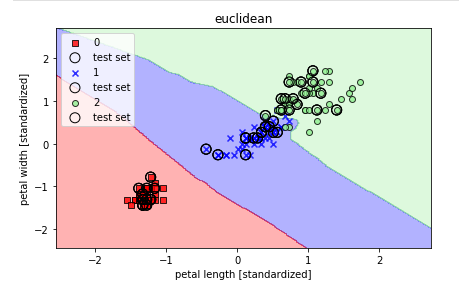

## Ei skaalattu

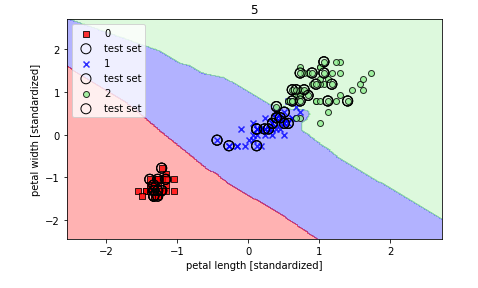

Kuten näkyy (tai paremminkin ei näy), visuaalisesti eroa ei juurikaan huomaa